<!---﻿---
layout: post
title: "Invertible calculus"
tags: [Math, Calculus, Fractional-Calculus]
math: true
---
-->

# Intro #
intro, Fractional calculus, did't know how to fix problems in FC, so try simplified slightly tangential problem in calculus. invertibility of the derivative, if we look at the fundamental theorem of calculus along with the Leibniz integral theorem

given a function $f(x)$ which is differentiable and integrable. Applying the fundimental theorem of callculus to the derivative of $f(x)$ gives the equation $\int_0^x \frac{d}{dt} f(t) dt = f(x) - f(0)$. Applying Leibniz integral rule to $f(x)$ gives the equation $\frac{d}{dx}\int_0^x f(t)dt = f(x)$. So compairing these equations shows the definite integral is not the inverse of the derivative since 
\begin{equation}
\frac{d}{dx} \int_0^x f(t)dt \neq \int_0^x \frac{d}{dt} f(t)dt
\end{equation}
, only in the case where $f(0) = 0$ is the definie integra the inverse of the derivative. from that you can see that the constants of integration in the process of antidifferentiation and likewise the bounds of integration are closely related to why derivatives are not invertible. if we consider only complex analytic functions, then we can show that the derivative does not have an inverse operator. Analytic functions have the property that the Taylor series of complex analytic function can all ways be analytically continued to the full domain of the analytic function. so the local behaviour of the Taylor series defines the behaviour of the full function, that is we can completely characterize an analytic function by the coefficients of the Taylor series. So an analytic function $f(x) \in \mathcal{O}(\mathbb{R})$ can be represented by the infinite sequence of terms of its taylor series $(a_0, a_1, a_2 ...)$, since that sequence uniquely defines the equation $f(x)$. Given a function $f(x) \in \mathcal{O}(\mathbb{R})$, if its series representation is $(a_0, a_1, a_2 ...)$, then the series representation of $\frac{d}{dx} f(x)$ is $(a_1, a_2, a_3 ...)$ and the sereis representation of $\int_0^x f(t)dt + a$ is $(a, a_0, a_1 ...)$. For example,

In [1]:
-- ONLY RUN ONCE
:l Taylor.hs
:l StackFunctions.hs

import qualified Taylor as TS (range, repeatList, printTaylor, plot)
import qualified StackFunctions as SF

Taylor Series: [1.0,0.0,-1.0,0.0,1.0,0.0,-1.0,0.0,1.0,0.0 ... ]

Taylor Series: [0.0,-1.0,0.0,1.0,0.0,-1.0,0.0,1.0,0.0,-1.0 ... ]

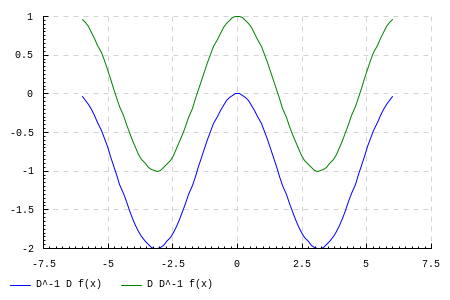

In [2]:
-- import qualified Taylor as TS (range, repeatList, printTaylor, plot)

type Coefficient = Double
type TaylorSeries = [Coefficient]

x = TS.range (-6, 6)

derivative :: TaylorSeries -> TaylorSeries
derivative (a_0:a_k) = a_k

antiderivative :: Double -> TaylorSeries -> TaylorSeries
antiderivative a a_k = a:a_k

cosX = TS.repeatList [1, 0, -1, 0] :: TaylorSeries

TS.printTaylor cosX
TS.printTaylor (derivative cosX)
TS.plot x [(antiderivative 0 (derivative cosX), "D^-1 D f(x)"), 
           (derivative (antiderivative 0 cosX), "D D^-1 f(x)")]

So the derivative is not invertible because the information contained in the first term of the Taylor series is lost during differentiation and it is impossible to completely invert this process.

# Stack Functions #
so what if the derivative did not loose information, looking at the behaviour of derivative and integrals on the terms of the Taylor series. differentiation removes the first element in the sequence of Taylor coefficients, and antidifferention adds the constant of integration to the beginning of the sequence of coefficients. the loss of information makes the derivative not invertible but what if the information was not lost but maintained with the function. adding the necessary information to invert the derivative each time one is taken and removing it when it is used to compute the corresponding antiderivative. it would be possible to in general invert the process of differentiation. so what should the structure of such an object be. it should be the function plus some a sequence of extra information. since we are discussing analytic functions which are infinitely differentiable and can be integrated infinitely so the extra information must be an infinitely long sequence to contain all of the information of derivatives that have been taken and antiderivative that can be taken. also we need to consider the order that the information is interacted with, if you have a function and take a number of derivative and after words take an antiderivative, then the antiderivate should use the information added by the last derivative, so the information is accessed in a "last in first out" order, so the extra information is accessed by differentiation, and integration like a stack from computer science. so lets define a new function we will call a stack function that consists of a pair of complex analytic function and a infinite sequence of numbers indexed from one to infinity. lets now define a derivative which acts on these stack functions, such that information is preserved

given a stack function $F(x) = (f(x), (c_1, c_2, c_3 ...))$ let us define the derivative of the stack function as $D F(x) = D (f(x), (c_1, c_2, c_3 ...)) = (\frac{d}{dx}f(x), (f(0), c_1, c_2 ...))$. Now given this derivative we can construct its inverse. Lets denote the inverse of the derivative as the antiderivative $D^{-1}$, since the value of $f(0)$ is known then the fundimental theorem of calculus can be rearanged to solve for the antiderivative of $\frac{d}{dx}f(x)$ then $D^{-1} (D F(x)) = D^{-1} (\frac{d}{dx}f(x), (f(0), c_1, c_2 ...)) = (\int_0^x f(t)dt + f(0), (c_1, c_2, c_3 ...)) = F(x)$. So the given a stack function $F(x) = (f(x), (c_1, c_2, c_3 ...))$ then

\begin{equation}
D F(x) = D (f(x), (c_1, c_2, c_3 ...)) = \left( \frac{d}{dx} f(x), (f(0), c_1, c_2 ...) \right)
\end{equation}
\begin{equation}
D^{-1} F(x) = D^{-1} (f(x), (c_1, c_2, c_3 ...)) = \left( \int_0^x f(t)dt + c_1, (c_2, c_3, c_4 ...) \right)
\end{equation}

Notice that the antiderivative is a left and right inverse of the derivative so this derivative is invertible,

\begin{equation}
D^{-1} D F(x) = D D^{-1} F(x) = F(x)
\end{equation}

# Analytic Functions #
if we only consider stack functions constructed from analytic functions, then we can produce a new representation of stack functions where the function in a stack function is represented by the sequence of coefficients of its Taylor series. so in this representation the stack function would be two sequences, the coefficients of the Taylor series and then the coefficients of the stack. now taking the derivation of a function using this representation what it does is removes the first element from the sequence of Taylor coefficients and adds it to the beginning of the stack.

given a stack function $F(x) = (f(x), (c_1, c_2, c_3 ...))$ if $f(x)$ is an analytic function with representation $(a_0, a_1, a_2 ...)$ then the stack function can be represented by $((a_0, a_1, a_2 ...), (c_1, c_2, c_3 ...))$. Using this representation the derivative and antiderivative on these stack functions is,

\begin{equation}
D F(x) = D ((a_0, a_1, a_2 ...), (c_1, c_2, c_3 ...)) = ((a_1, a_2, a_3 ...), (a_0, c_1, c_2 ...))
\end{equation}
\begin{equation}
D^{-1} F(x) = D^{-1} ((a_0, a_1, a_2 ...), (c_1, c_2, c_3 ...)) = ((c_1, a_0, a_1 ...), (c_2, c_3, c_4 ...))
\end{equation}

so we can see taking derivatives and antiderivative just moves the first element from the Taylor coefficients to the stack and vise versa. so alternatively we could represent this function as a single sequence indexed from minus infinity to infinity, with the elements indexed from zero to infinity containing the Taylor coefficients, the elements with negative index contain the elements of the stack with the absolute value of the index (reverse order from zero). To indicate which element has index $n=0$ lets suround it by brakets, then the stack function $F(x) = (f(x), (c_1, c_2, c_3 ...))$ has the representation $(... c_2, c_1, \langle a_0 \rangle, a_1, a_2 ...)$, so we can write stack functions as $F(x) = (... a_{-2}, a_{-1}, \langle a_0 \rangle, a_1, a_2 ...)$. taking the derivative of an object in this representation simply shifts all of the elements of the sequence to the left, and antidifferentiation moves them to the right. so calculus operators in this representation is equivalent to shifting the elements of this list (which does not remove any information and is invertible)

given a stack function $F(x) = F(x) = (... a_{-2}, a_{-1}, \langle a_0 \rangle, a_1, a_2 ...)$ the derivative and antiderivative on this stack functions is,

\begin{equation}
D F(x) = D (... a_{-2}, a_{-1}, \langle a_0 \rangle, a_1, a_2 ...) = (... a_{-1}, a_0, \langle a_1 \rangle, a_2, a_3 ...)
\end{equation}
\begin{equation}
D^{-1} F(x) = D^{-1} (... a_{-2}, a_{-1}, \langle a_0 \rangle, a_1, a_2 ...) = (... a_{-3}, a_{-2}, \langle a_{-1} \rangle, a_0, a_1 ...)
\end{equation}

for example

In [3]:
-- :m -Calculus.InvertibleCalculus.Taylor
-- ONLY RUN ONCE
-- :l StackFunctions.hs
-- :m -Calculus.InvertibleCalculus.StackFunctions

In [4]:
-- import qualified StackFunctions as SF

-- definition of StackFunction type
-- type Coefficient = Double
-- data StackFunction = StackFunction [Coefficient] [Coefficient]

x = SF.range (-6, 6)  

derivative :: SF.StackFunction -> SF.StackFunction
derivative (SF.StackFunction (a_0:a_k) c_k) = SF.StackFunction a_k (a_0:c_k)

antiderivative :: SF.StackFunction -> SF.StackFunction
antiderivative (SF.StackFunction a_k (c_1:c_k)) = SF.StackFunction (c_1:a_k) c_k

cosX = SF.StackFunction (SF.repeatList [1, 0, -1, 0]) (SF.repeatList [0, -1, 0, 1])

print cosX
print (derivative cosX)
SF.plot x [(antiderivative (derivative cosX), "D^-1 D f(x)"), 
           (derivative (antiderivative cosX), "D D^-1 f(x)"), 
           (derivative (antiderivative cosX) - antiderivative (derivative cosX), "[D, D^-1] f(x)")]

: 

# Is it a derivative? #
so now on stack functions we have an operator that we call the derivative but how does it compare to the ordinary definitinition of derivative in terms of limits. before we can do that we need to define addition and scalar multiplication. looking at how addition and scalar multiplication act on analytic functions in terms of their Taylor series we can see an obvious consistent way to add and scale stack functions.

given stack functions $F(x) = (... a_{-2}, a_{-1}, \langle a_0 \rangle, a_1, a_2 ...)$, $G(x) = (... b_{-2}, b_{-1}, \langle b_0 \rangle, b_1, b_2 ...)$ and $c \in \mathbb{R}$. Then define scalar multiplication and addition of stack functions as,

\begin{equation}
F(x) + G(x) = (... a_{-2} + b_{-2}, a_{-1} + b_{-1}, \langle a_0 + b_0 \rangle, a_1 + b_1, a_2 + b_2 ...)
\end{equation}

\begin{equation}
c \cdot F(x) = (... c \cdot a_{-2}, c \cdot a_{-1}, \langle c \cdot a_0 \rangle, c \cdot a_1, c \cdot a_2 ...)
\end{equation}


before we can compare this definition of the derivative to the ordinary version. we need to be able to shift stack functions that is reproduce all of the values of a stack function with some offset. the stack function is just all of the derivatives and antiderivatives evaluated at some point, so if we compute the derivative and antiderivatives of a stack function at some other point then this can be combined to produce a new stack function that is a shifted version of the original. since we are only considering analytic function and the Taylor series of every analytic function has a nonzero radius of convergence then for any analytic stack function shifted versions of the stack function are all ways defined in terms of Taylor series for sufficiently small nonzero shifts.

\begin{equation}
\Delta_y F(x) = \Delta_y (... a_{-2}, a_{-1}, \langle a_0 \rangle, a_1, a_2 ...) = (... D^{-2} F(y), D^{-1} F(y), \langle F(y) \rangle, D F(y), D^2 F(y) ...)
\end{equation}

where $D^n F(y) = \sum_{k=0}^\infty a_{k+n} \frac{y^k}{k!}$ for any $n \in \mathbb{Z}$. so now we are ready to apply the ordinary definition of the derivative, i.e. the limit of the difference of shifted versions of a stack function over the amount shifted by, this should be in some sense the derivative of a stack function. $\frac{d}{dx} F(x) = \lim_{h \to 0} \frac{\Delta_h F(x) - F(x)}{h} = \lim_{h \to 0} (... b_{-2}(h), b_{-1}(h), \langle b_0(h) \rangle, b_1(h), b_2(h) ...)$, where $b_n(h) = (\sum_{k=0}^\infty a_{k+n} \frac{h^k}{k!} - a_n)/h = (a_n - a_n + a_{n+1} \cdot h + \sum_{k=2}^\infty a_{k+n} \frac{h^k}{k!})/h$, so then $\lim_{h \to 0} b_n(h) = a_{n+1}$

\begin{equation}
\frac{d}{dx} F(x) = \lim_{h \to 0} (... b_{-2}(h), b_{-1}(h), \langle b_0(h) \rangle, b_1(h), b_2(h) ...) = (... a_{-1}, a_0, \langle a_1 \rangle, a_2, a_3 ...) = D F(x)
\end{equation}

the limit definition of the derivative of a stack function reproduces the definition of a derivative in terms of shifting coefficients that was defined earlier. and so it is valid to use consider the shifting of terms of the stack function a derivative.

# Reproduce calculus #
we now have some justification in describing the operators previously described as derivative and anti derivative. since it is equal to result you would get when applying the normal limit definition of the derivative to a stack function and the antiderivative is the inverse operation. but how does this relate to the derivatives and integrals of ordinary function. lets define some functions, the projection operator psi that takes the extra information in a stack function and sets it to zero and a second function pi which constructs a normal function from a stack function by constructing the Taylor series from the coefficients in the stack function. using these two operations we can then explicitly define the ordinary derivative and integral of an analytic function in terms of these two operators.

given a stack function $F(x) = (f(x), (a_{-1}, a_{-2}, a_{-3} ...)) = (... a_{-2}, a_{-1}, \langle a_0 \rangle, a_1, a_2 ...)$, then $\psi(F)(x) = \psi(... a_{-2}, a_{-1}, \langle a_0 \rangle, a_1, a_2 ...) = (... 0, 0, 0, \langle a_0 \rangle, a_1, a_2 ...)$ and $\pi(F)(x) = \pi(... a_{-2}, a_{-1}, \langle a_0 \rangle, a_1, a_2 ...) = \sum_{k=0}^\infty a_k \frac{x^k}{k!} = f(x)$

now $\pi(D F)(x) = \sum_{k=0}^\infty a_{k+1} \frac{x^k}{k!} = \frac{d}{dx}f(x)$ and $\pi(D^{-1}\psi(F))(x)=\pi(D^{-1} (... 0, 0, 0, \langle a_0 \rangle, a_1, a_2 ...)) = 0 + \sum_{k=1}^\infty a_{k-1} \frac{x^k}{k!} = \int_0^x f(t)dt$ and so $\pi(D^{-1}\psi(F))(x) - \pi(D^{-1}\psi(F))(a) = \int_a^x f(t)dt$

rather than removing the extra information, if we set it to our desired constants of integration we can reproduce any definite integral of that form.

# ODEs #
is the extra information stored in stack functions in the coefficients with negative indices always arbitrary, or is there another way to get to stack functions, a natural way to construct stack functions. if we consider Homogeneous Linear Ordinary Differential Equations with Constant Coefficients. initial value problems of such operators can be solved by finding the recursive relation defining the operator.
given the operator $L = \frac{d^2}{dx^2} - 6\frac{d}{dx} + 13$, given the analytic function $f(x)$ is a solution to $L f(x) = 0$ then the terms of its taylor series follows the recursiv equation $a_n = 6a_{n-1} - 13a_{n-2}$, example for $L f(x) = 0$ with $f(0)=0.5$ and $f'(0)=-1$,

In [5]:
x = TS.range (-3, 3)

-- f'' - 6f' + 13f = 0
a_k :: Integer -> Double
a_k 0 = 0
a_k 1 = 1
a_k k = 6*a_k (k-1) - 13*a_k (k-2)

as = [a_k k | k <- [0..30]] ++ repeat 0

fX = as :: TaylorSeries

TS.print fX
TS.print (derivative fX)
TS.plot x [(antiderivative 0 (derivative fX), "D^-1 D f(x)"), 
           (derivative (antiderivative 0 fX), "D D^-1 f(x)")]

Line 4: Use camelCase
Found:
a_k :: Integer -> Double
Why not:
aK :: Integer -> DoubleLine 5: Use camelCase
Found:
a_k 0 = ...
a_k 1 = ...
a_k k = ...
Why not:
aK 0 = ...
aK 1 = ...
aK k = ...

: 

now if we are given a modified IVP where the initial valued supplied are for higher order derivatives, for example for a second order problem if the third and fourth derivative are given, then problems of this sort can also be solved using the recursive relation defined by the operation but we would also need to reverse the recursive relation.

In [6]:
-- code example

using the reverse recursive equation we can find the lower order of the Taylor series (terms a2, a1, a0) this gives the full solution of f(x) that solves the IVP where Lf^(n)=0. then considering these types of solutions generally we are always looking for solutions where f(x) solves the IVP and L on any derivative of f(x) is zero, that is to say the function satisfies the initial conditions and the function and all of its derivative satisfy the recursive relation. so what if we use the reverses recursive relation to compute a hypothetical term a{-1}. - symbolic def y = int_0^x f + a-1 this is the only antiderivative of the solution f(x) which also solves Ly=0. this way we found that if we computed the term a{-1} it defines a unique antiderivative of the solution such that y and all of its derivatives satisfies the recursive relation and the derivative of the function satisfies the IVP. so if we take coefficients with negative indices seriously it can then be thought of as finding the unique nth order antiderivative such that the IVP is satisfied and it and all of its derivative satisfies the recursive relation. this would then expand the sequence of Taylor series to generalized sequence indexed from negative infinity to infinity. this sequence would be uniquely defined and such that it satisfies the recursive relationship for all terms and it satisfies the IVP. If we interpret the function as a stack function the it the unique stack function such that its derivatives and antiderivatives satisfy Ly=0.

- symbolic sections

so Homogeneous linear ordinary differential equations with constant coefficients naturally define stack functions as their solutions. so if you consider this more general Taylor series these solution are stack functions. stack functions naturally exist as solutions to problems of this type.